In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

In [17]:
data = []
data.append(sio.loadmat('data/P_rita.mat')['data'])
data.append(sio.loadmat('data/P_nicolas.mat')['data'])

In [22]:
# count number of 150 triggers in the data
n_p = 0
for part in data:

    n_left_bad = 0
    n_right_bad = 0
    n_left_good = 0
    n_right_good = 0
    n_no_response = 0
    for i in range(part.shape[0]):
        if part[i, 3] == 150:
            n_left_bad += 1
        elif part[i, 3] == 155:
            n_right_bad += 1
        elif part[i, 3] == 120:
            n_left_good += 1
        elif part[i, 3] == 122:
            n_right_good += 1
        elif part[i, 3] == 130:
            n_no_response += 1
    print('Participant:', n_p)
    print('Number of bad left triggers:', n_left_bad)
    print('Number of bad right triggers:', n_right_bad)
    print('Number of no response triggers:', n_no_response)
    print('Number of good left triggers:', n_left_good)
    print('Number of good right triggers:', n_right_good)
    print('Total number of trials:', n_left_bad + n_right_bad + n_left_good + n_right_good + n_no_response)
    print('Total number of bad trials:', n_left_bad + n_right_bad + n_no_response)
    print()
    n_p += 1


Participant: 0
Number of bad left triggers: 7
Number of bad right triggers: 10
Number of no response triggers: 6
Number of good left triggers: 19
Number of good right triggers: 18
Total number of trials: 60
Total number of bad trials: 23

Participant: 1
Number of bad left triggers: 5
Number of bad right triggers: 7
Number of no response triggers: 2
Number of good left triggers: 22
Number of good right triggers: 18
Total number of trials: 54
Total number of bad trials: 14



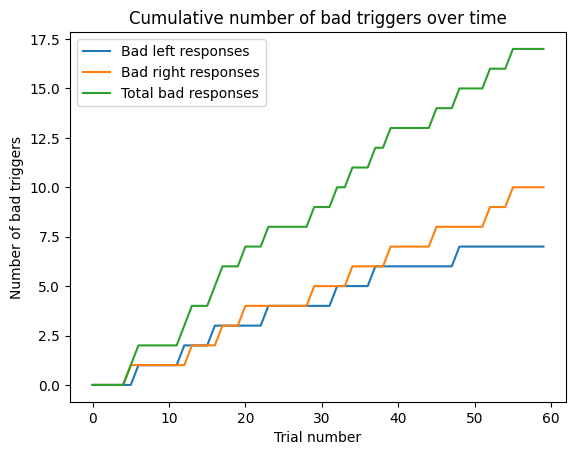

In [5]:
# plot total cumulative number of bad responses over time
plt.figure()
plt.plot(np.cumsum(data[:,3] == 150), label='Bad left responses')
plt.plot(np.cumsum(data[:,3] == 155), label='Bad right responses')
plt.plot(np.cumsum(data[:,3] == 150) + np.cumsum(data[:,3] == 155), label='Total bad responses')
plt.legend()
plt.xlabel('Trial number')
plt.ylabel('Number of bad triggers')
plt.title('Cumulative number of bad triggers over time')
plt.show()

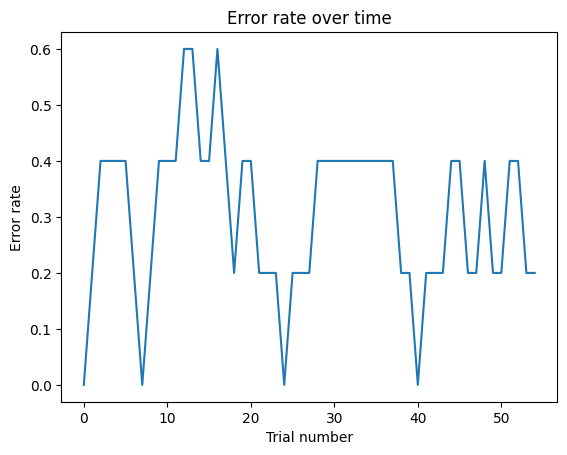

In [6]:
# plot evolving error rate
h = 5
error_rate = np.zeros(data.shape[0]-h)
for i in range(data.shape[0]-h):
    error_rate[i] = (np.sum(data[i:i+h, 3] == 150) + np.sum(data[i:i+h, 3] == 155)) / h

plt.figure()
plt.plot(error_rate)
plt.xlabel('Trial number')
plt.ylabel('Error rate')
plt.title('Error rate over time')
plt.show()





In [23]:
import pandas as pd

# create a pandas dataframe
df_rita = pd.DataFrame(data[0], columns=['trial_type', 'response', 'arrow_direction', 'trigger'])
df_nicolas = pd.DataFrame(data[1], columns=['trial_type', 'response', 'arrow_direction', 'trigger'])

In [25]:
for df in [df_rita, df_nicolas]:
    print(df[df['trial_type']==2].groupby('trigger').count())

         trial_type  response  arrow_direction
trigger                                       
120               2         2                2
122               3         3                3
130               3         3                3
150               4         4                4
155               6         6                6
         trial_type  response  arrow_direction
trigger                                       
120.0             9         9                9
122.0             6         6                6
150.0             2         2                2
155.0             3         3                3


In [27]:
for df in [df_rita, df_nicolas]:
    print(df[df['trial_type']==3].groupby('trigger').count())

         trial_type  response  arrow_direction
trigger                                       
120              15        15               15
122              11        11               11
130               3         3                3
150               3         3                3
155               4         4                4
         trial_type  response  arrow_direction
trigger                                       
120.0            10        10               10
122.0            11        11               11
130.0             2         2                2
150.0             2         2                2
155.0             3         3                3


In [28]:
for df in [df_rita, df_nicolas]:
    print(df[df['trial_type']==1].groupby('trigger').count())

         trial_type  response  arrow_direction
trigger                                       
120               2         2                2
122               4         4                4
         trial_type  response  arrow_direction
trigger                                       
120.0             3         3                3
122.0             1         1                1
150.0             1         1                1
155.0             1         1                1


In [5]:
import pyxdf
import matplotlib.pyplot as plt
import numpy as np

data, header = pyxdf.load_xdf('data/pilot_1_training.xdf')

In [78]:
type(data)

list

In [7]:

header

{'info': defaultdict(list, {'version': ['1.0']})}

In [8]:
data[1]['info']

defaultdict(list,
            {'name': ['BioSemi'],
             'type': ['EEG'],
             'channel_count': ['73'],
             'nominal_srate': ['512'],
             'channel_format': ['float32'],
             'source_id': ['UG-FFSMBX3'],
             'version': ['1.1000000000000001'],
             'created_at': ['5344.3533964999997'],
             'uid': ['48bee5f5-ebca-4ddf-8442-77bff096a955'],
             'session_id': ['default'],
             'hostname': ['UG-FFSMBX3'],
             'v4address': [None],
             'v4data_port': ['16572'],
             'v4service_port': ['16576'],
             'v6address': [None],
             'v6data_port': ['16572'],
             'v6service_port': ['16576'],
             'desc': [defaultdict(list,
                          {'cap': [defaultdict(list,
                                        {'size': ['54'],
                                         'labelscheme': ['BioSemi-ABC']})],
                           'amplifier': [defaultdict(list

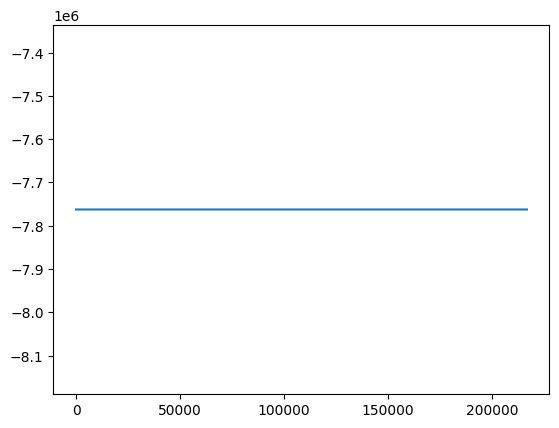

In [9]:
plt.plot(data[1]["time_series"][:,0])

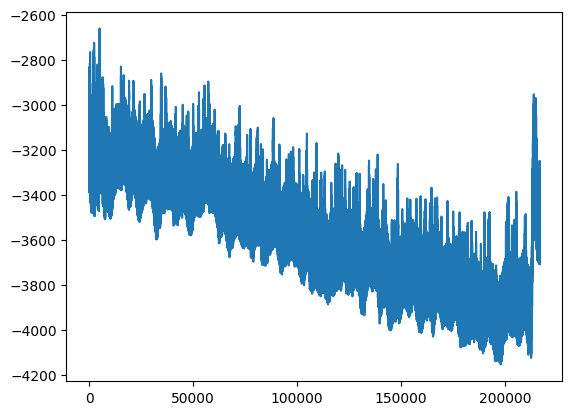

In [10]:
plt.plot(data[1]["time_series"][:,1])

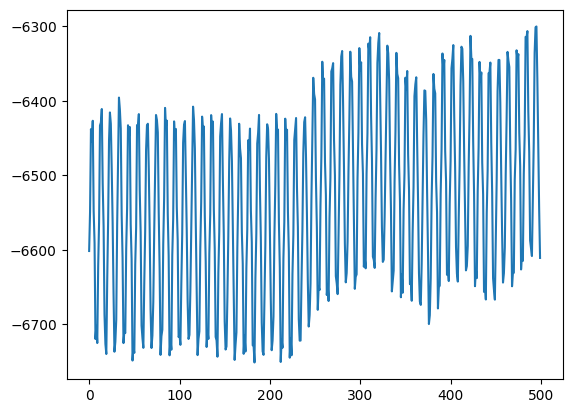

In [11]:
plt.plot(data[1]["time_series"][:500,3])

In [12]:
data[1]['info']

defaultdict(list,
            {'name': ['BioSemi'],
             'type': ['EEG'],
             'channel_count': ['73'],
             'nominal_srate': ['512'],
             'channel_format': ['float32'],
             'source_id': ['UG-FFSMBX3'],
             'version': ['1.1000000000000001'],
             'created_at': ['5344.3533964999997'],
             'uid': ['48bee5f5-ebca-4ddf-8442-77bff096a955'],
             'session_id': ['default'],
             'hostname': ['UG-FFSMBX3'],
             'v4address': [None],
             'v4data_port': ['16572'],
             'v4service_port': ['16576'],
             'v6address': [None],
             'v6data_port': ['16572'],
             'v6service_port': ['16576'],
             'desc': [defaultdict(list,
                          {'cap': [defaultdict(list,
                                        {'size': ['54'],
                                         'labelscheme': ['BioSemi-ABC']})],
                           'amplifier': [defaultdict(list

In [13]:
# create mne info structure
import mne
ch_names = []
ch_types = []
for i in range(int(data[1]['info']['channel_count'][0])):
    ch_names.append((data[1]['info']['desc'][0]['channels'][0]['channel'][i]['label'][0]))
    ch_types.append(str.lower(data[1]['info']['desc'][0]['channels'][0]['channel'][i]['type'][0]))

s_freq = int(data[1]['info']['nominal_srate'][0])

ch_names = ch_names[1:]
ch_types = ch_types[1:]

for i in range(len(ch_names)):
    if ch_types[i] == 'eeg':
        ch_types[i] = 'eeg'
    elif ch_types[i] == 'eog':
        ch_types[i] = 'eog'
    else:
        ch_types[i] = 'misc'

In [14]:
for ch_n, ch_t in zip(ch_names, ch_types):
    print(ch_n, ch_t)
print('Nominal sampling rate:', s_freq)

A1 eeg
A2 eeg
A3 eeg
A4 eeg
A5 eeg
A6 eeg
A7 eeg
A8 eeg
A9 eeg
A10 eeg
A11 eeg
A12 eeg
A13 eeg
A14 eeg
A15 eeg
A16 eeg
A17 eeg
A18 eeg
A19 eeg
A20 eeg
A21 eeg
A22 eeg
A23 eeg
A24 eeg
A25 eeg
A26 eeg
A27 eeg
A28 eeg
A29 eeg
A30 eeg
A31 eeg
A32 eeg
B1 eeg
B2 eeg
B3 eeg
B4 eeg
B5 eeg
B6 eeg
B7 eeg
B8 eeg
B9 eeg
B10 eeg
B11 eeg
B12 eeg
B13 eeg
B14 eeg
B15 eeg
B16 eeg
B17 eeg
B18 eeg
B19 eeg
B20 eeg
B21 eeg
B22 eeg
B23 eeg
B24 eeg
B25 eeg
B26 eeg
B27 eeg
B28 eeg
B29 eeg
B30 eeg
B31 eeg
B32 eeg
EX1 misc
EX2 misc
EX3 misc
EX4 misc
EX5 misc
EX6 misc
EX7 misc
EX8 misc
Nominal sampling rate: 512


In [15]:
info = mne.create_info(ch_names, s_freq, ch_types)

In [16]:
info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"64 EEG, 8 misc"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,256.00 Hz


In [17]:
raw = mne.io.RawArray(data[1]["time_series"].T[1:]*1e-6, info)

Creating RawArray with float64 data, n_channels=72, n_times=216778
    Range : 0 ... 216777 =      0.000 ...   423.393 secs
Ready.


In [18]:
raw.set_eeg_reference(['EX1', 'EX2'])

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"64 EEG, 8 misc"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,256.00 Hz


In [19]:
%matplotlib qt
raw.plot(scalings=dict(eeg=100e-6),duration=1, start=14)
plt.show()

Using matplotlib as 2D backend.


In [20]:
data[0]['time_series']

[['cross'],
 ['rest'],
 ['right'],
 ['imagery'],
 ['rest'],
 ['pause'],
 ['cross'],
 ['rest'],
 ['right'],
 ['imagery'],
 ['rest'],
 ['pause'],
 ['cross'],
 ['rest'],
 ['left'],
 ['imagery'],
 ['rest'],
 ['pause'],
 ['cross'],
 ['rest'],
 ['left'],
 ['imagery'],
 ['rest'],
 ['pause'],
 ['cross'],
 ['rest'],
 ['left'],
 ['imagery'],
 ['rest'],
 ['pause'],
 ['cross'],
 ['rest'],
 ['left'],
 ['imagery'],
 ['rest'],
 ['pause'],
 ['cross'],
 ['rest'],
 ['left'],
 ['imagery'],
 ['rest'],
 ['pause'],
 ['cross'],
 ['rest'],
 ['left'],
 ['imagery'],
 ['rest'],
 ['pause'],
 ['cross'],
 ['rest'],
 ['left'],
 ['imagery'],
 ['rest'],
 ['pause'],
 ['cross'],
 ['rest'],
 ['right'],
 ['imagery'],
 ['rest'],
 ['pause'],
 ['cross'],
 ['rest'],
 ['left'],
 ['imagery'],
 ['rest'],
 ['pause'],
 ['cross'],
 ['rest'],
 ['right'],
 ['imagery'],
 ['rest'],
 ['pause'],
 ['cross'],
 ['rest'],
 ['left'],
 ['imagery'],
 ['rest'],
 ['pause'],
 ['cross'],
 ['rest'],
 ['right'],
 ['imagery'],
 ['rest'],
 ['pause'],
 

In [21]:
event_samples = ((data[0]['time_stamps']-data[0]['time_stamps'][0])*512).astype(int)
events = np.zeros((len(raw.times), 1))

# % BioSemi triggers
# % 120: left good
# % 122: right good
# % 150: left bad
# % 155: right bad
# % 130: no response
# % 140: left
# % 141: right
# % 200: cross
# % 201: stim
# % 202: decision
# % 203: feedback
# % 204: rest
# % 205: imagery
# % 206: pause

event_id = {'left_good': 120, 'right_good': 122, 'left_bad': 150, 'right_bad': 155, 'no_response': 130, 'left': 140, 'right': 141, 'cross': 200, 'stim': 201, 'decision': 202, 'feedback': 203, 'rest': 204, 'imagery': 205, 'pause': 206}
for i in range(len(event_samples)):
    events[event_samples[i]] = event_id[data[0]['time_series'][i][0]]


In [22]:
event_info = mne.create_info(['STI'], raw.info['sfreq'], ['stim'])
event_info

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,1 Stimulus
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,256.00 Hz


In [23]:
event_raw = mne.io.RawArray(events.T, event_info)

Creating RawArray with float64 data, n_channels=1, n_times=216778
    Range : 0 ... 216777 =      0.000 ...   423.393 secs
Ready.


In [24]:
raw = raw.add_channels([event_raw], force_update_info=True)

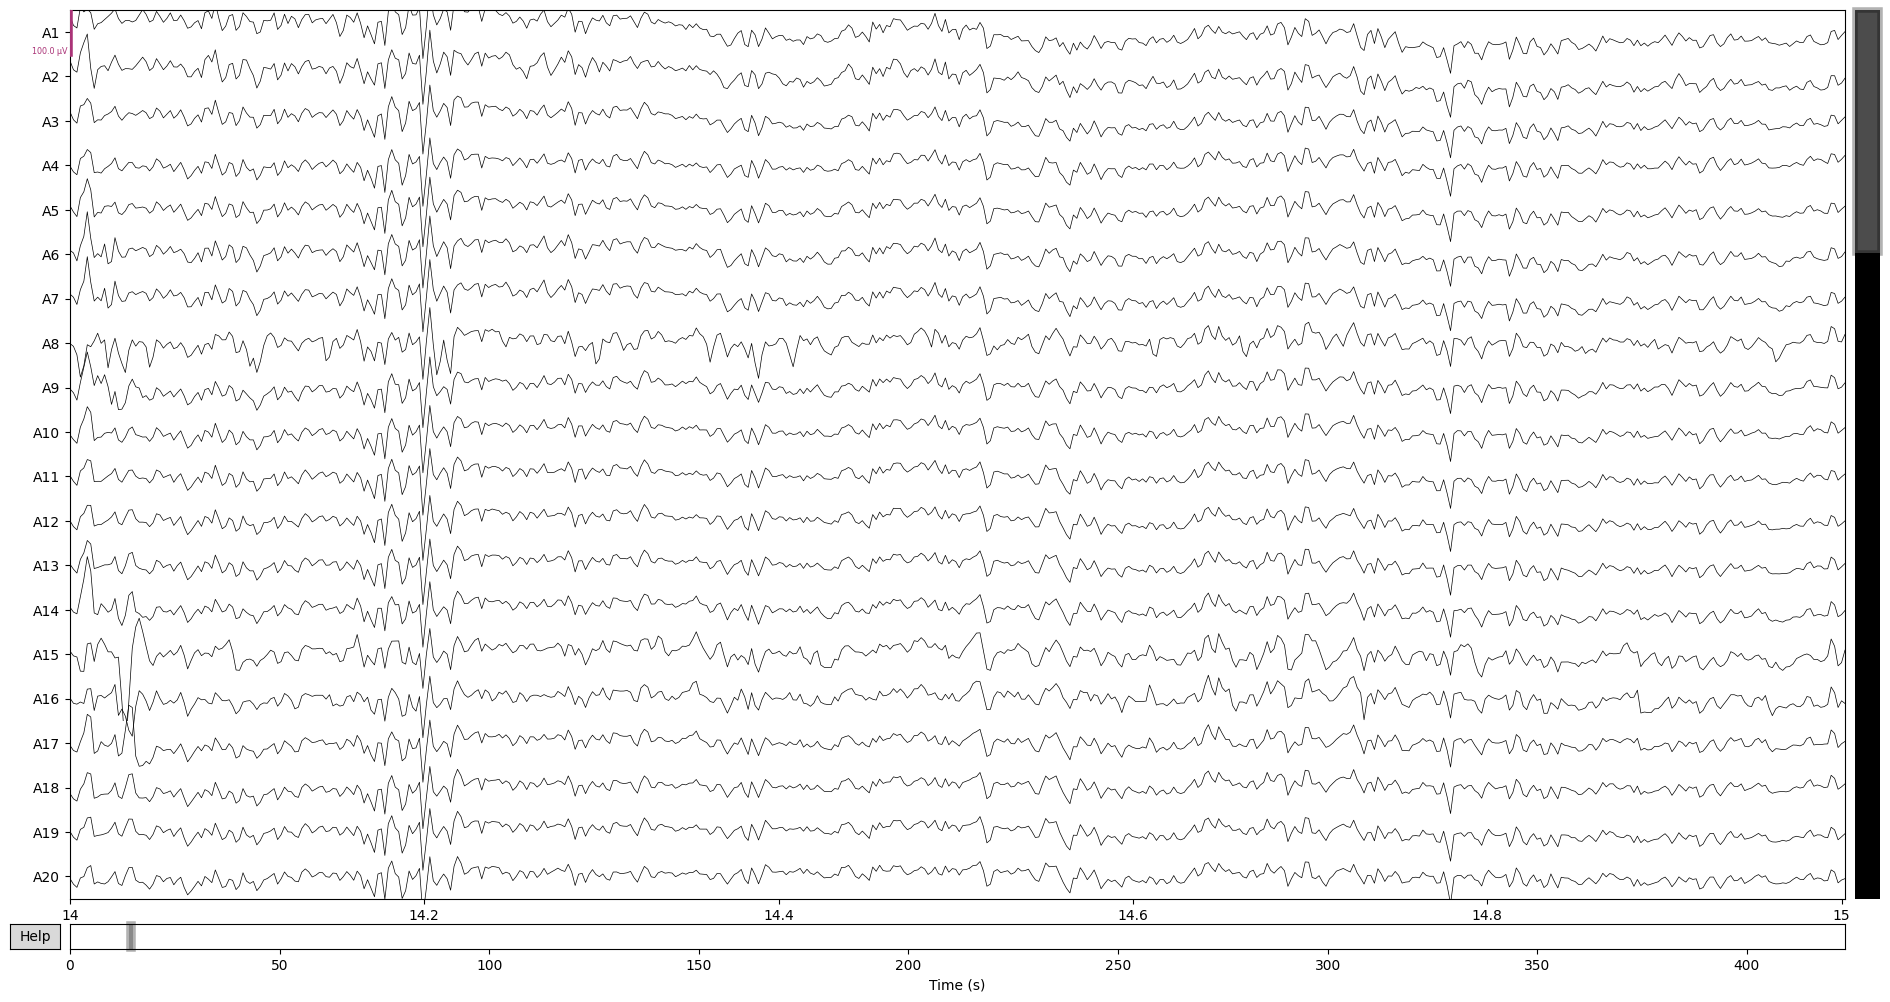

In [25]:
raw.plot(scalings=dict(eeg=50e-6),duration=1, start=14)

In [63]:
# Read electrode locations
locations = {}
for i in range(1,int(data[1]['info']['channel_count'][0])):
    if data[1]['info']['desc'][0]['channels'][0]['channel'][i]['label'][0] == 'EX1':
        break
    locations[data[1]['info']['desc'][0]['channels'][0]['channel'][i]['label'][0]] = data[1]['info']['desc'][0]['channels'][0]['channel'][i]['location']

In [66]:
locations

{'A1': [950.0, -309.0, -35.0],
 'A2': [809.0, -587.0, -35.0],
 'A3': [871.0, -406.0, 276.0],
 'A4': [710.0, -287.0, 643.0],
 'A5': [673.0, -545.0, 500.0],
 'A6': [634.0, -729.0, 259.0],
 'A7': [587.0, -809.0, -35.0],
 'A8': [309.0, -950.0, -35.0],
 'A9': [341.0, -888.0, 309.0],
 'A10': [360.0, -676.0, 643.0],
 'A11': [375.0, -375.0, 848.0],
 'A12': [0.0, -391.0, 921.0],
 'A13': [0.0, -719.0, 695.0],
 'A14': [0.0, -934.0, 358.0],
 'A15': [0.0, -999.0, -35.0],
 'A16': [-309.0, -950.0, -35.0],
 'A17': [-341.0, -888.0, 309.0],
 'A18': [-360.0, -676.0, 643.0],
 'A19': [-375.0, -375.0, 848.0],
 'A20': [-710.0, -287.0, 643.0],
 'A21': [-673.0, -545.0, 500.0],
 'A22': [-634.0, -729.0, 259.0],
 'A23': [-587.0, -809.0, -35.0],
 'A24': [-533.0, -733.0, -423.0],
 'A25': [-809.0, -587.0, -35.0],
 'A26': [-871.0, -406.0, 276.0],
 'A27': [-950.0, -309.0, -35.0],
 'A28': [-906.0, 0.0, -423.0],
 'A29': [-999.0, 0.0, -35.0],
 'A30': [-934.0, 0.0, 358.0],
 'A31': [-719.0, 0.0, 695.0],
 'A32': [-391.0, 0.

In [65]:
for location in locations.keys():
    cur_pos = [float(locations[location][0]['X'][0]), float(locations[location][0]['Y'][0]), float(locations[location][0]['Z'][0])]
    locations[location] = cur_pos


In [89]:
montage = mne.channels.make_standard_montage('biosemi64')

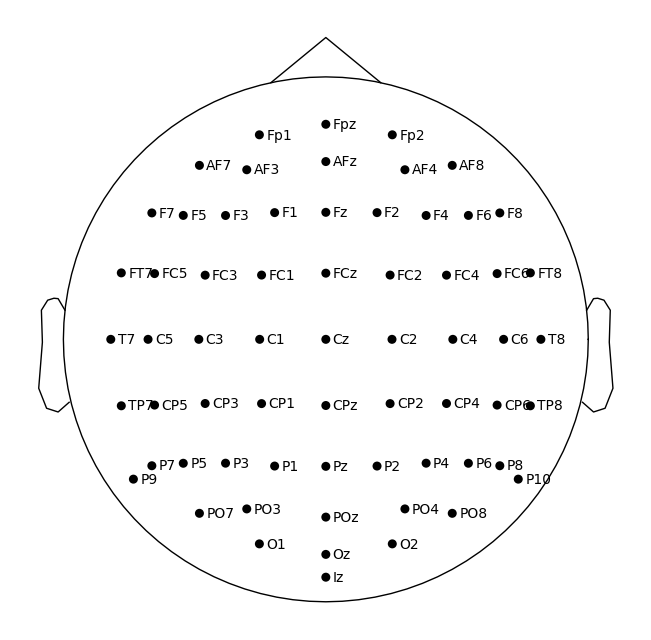

In [90]:
montage.plot()

In [92]:
new_names = dict(zip(raw.ch_names, montage.ch_names))
raw.rename_channels(new_names)
raw.set_montage(montage, on_missing='ignore')

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,"64 EEG, 8 misc, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,256.00 Hz


In [67]:
raw.set_montage(mne.channels.make_dig_montage(locations))

C:\Users\Emile\AppData\Local\Temp\ipykernel_23140\2621862202.py:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(mne.channels.make_dig_montage(locations))


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,"64 EEG, 8 misc, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,256.00 Hz


In [69]:
events  = mne.find_events(raw, stim_channel='STI')

Trigger channel STI has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
160 events found on stim channel STI
Event IDs: [140 141 204 205 206]


In [70]:

event_id_cut= {'left': 140, 'right': 141, 'rest': 204, 'imagery': 205, 'pause': 206}

In [71]:
fig = mne.viz.plot_events(events, sfreq = raw.info['sfreq'], first_samp = raw.first_samp, event_id=event_id_cut)

In [72]:
epochs = mne.Epochs(
    raw,
    events,
    event_id=event_id_cut,
    tmin=-0.1,
    tmax=0.4,
    preload=True,
)

Not setting metadata
160 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 257 original time points ...
1 bad epochs dropped


In [73]:
conds_we_care_about = ["left", "right", "imagery"]
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place

Dropped 36 epochs: 4, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156


(<Epochs |  123 events (all good), -0.0996094 – 0.400391 s, baseline -0.0996094 – 0 s, ~17.7 MB, data loaded,
  'left': 2
  'right': 2
  'rest': 77
  'imagery': 2
  'pause': 40>,
 array([ 12,  16,  20,  24,  28,  32,  40,  48,  56,  68,  88,  92, 104,
        108, 112, 140, 152, 156,   4,  36,  44,  52,  60,  64,  72,  76,
         96, 100, 116, 120, 124, 128, 132, 136, 144, 148], dtype=int64))

In [74]:
epochs.plot_image(picks=["A3", "B6"])

Not setting metadata
123 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
123 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 640x480 with 4 Axes>, <Figure size 640x480 with 4 Axes>]

In [75]:
epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.7, event_id=event_id_cut, preload=True)
evoked = epochs["left"].average()

Not setting metadata
160 matching events found
Setting baseline interval to [-0.30078125, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 160 events and 513 original time points ...
1 bad epochs dropped


In [76]:
print(f"Epochs baseline: {epochs.baseline}")
print(f"Evoked baseline: {evoked.baseline}")

Epochs baseline: (-0.30078125, 0.0)
Evoked baseline: (-0.30078125, 0.0)


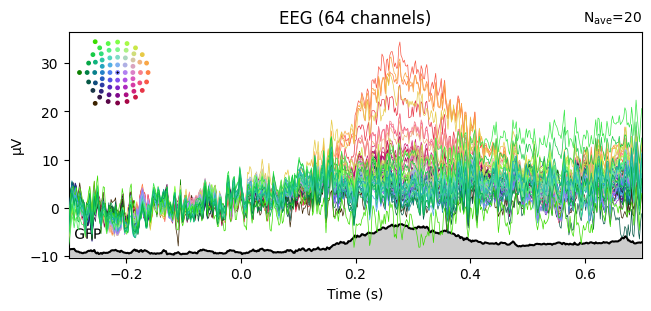

In [77]:
evoked.plot(spatial_colors=True, gfp=True, time_unit="s")

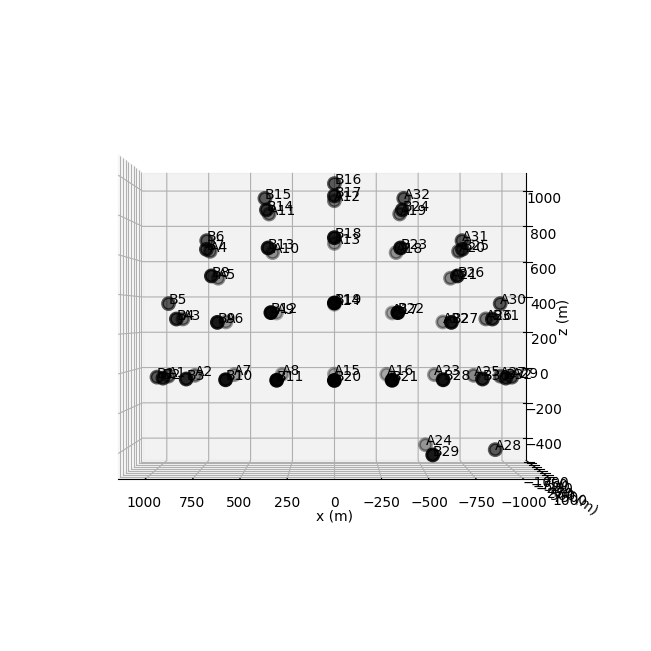

In [87]:
# plot montage
raw.plot_sensors(show_names=True, kind='3d', to_sphere=True)
